**Predicting Loan Status using Decision Trees**
**Data Description:**
 The data is taken from Kaggle Lending club lone data.The database of the lending club lone data contains data from 2007 to 2015.There are about  nearly 8 lakh datapoints with 75 features
 
**Libraries Used:**
Numpy
Matplotlib
SQL queries
Scikitlearn

**Features used:**(The feature description is from https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-)

Title:It is provided by the borrower


Data filtered using the titles in the pupose field:


"credit card"


"medical"


"debt"

**Loan Status**:

This is the target variable which we desired for.


The current state of the particular loan


0:"FULLY PAID" or "CURRENT"


1:"CHARGED OFF" or "LATE" or "DEFAULT"


**loan_amnt**: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


**int_rate**: Interest Rate on the loan.


**annual_inc**: The self-reported annual income provided by the borrower during registration.


**delinq_2yrs**: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.


**open_acc**: The number of open credit lines in the borrower's credit file.


**emp_length**: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.


**funded_amnt**: The total amount committed to that loan at that point in time.


**tot_cur_bal**: Total current balance of all accounts.


**home_ownership**: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.


It is classified as follows:


MORTGAGE-0


OWN-1


RENT-2


OTHERS-3


NONE-4


ANY-5




In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}



Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [5]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
 print('User uploaded file "{name}" with length {length} bytes'.format(
     name=fn, length=len(uploaded[fn])))

KeyboardInterrupt: ignored

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
!pip install -U -q PyDrive

In [4]:
!pip install imblearn

    100% |████████████████████████████████| 153kB 5.4MB/s 


In [5]:
!pip install graphviz
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
import graphviz

Selecting previously unselected package fontconfig.
(Reading database ... 19735 files and directories currently installed.)
Preparing to unpack .../00-fontconfig_2.11.94-0ubuntu2_amd64.deb ...
Unpacking fontconfig (2.11.94-0ubuntu2) ...
Selecting previously unselected package libjbig0:amd64.
Preparing to unpack .../01-libjbig0_2.1-3.1_amd64.deb ...
Unpacking libjbig0:amd64 (2.1-3.1) ...
Selecting previously unselected package libcdt5.
Preparing to unpack .../02-libcdt5_2.38.0-16ubuntu2_amd64.deb ...
Unpacking libcdt5 (2.38.0-16ubuntu2) ...
Selecting previously unselected package libcgraph6.
Preparing to unpack .../03-libcgraph6_2.38.0-16ubuntu2_amd64.deb ...
Unpacking libcgraph6 (2.38.0-16ubuntu2) ...
Selecting previously unselected package libtiff5:amd64.
Preparing to unpack .../04-libtiff5_4.0.8-5ubuntu0.1_amd64.deb ...
Unpacking libtiff5:amd64 (4.0.8-5ubuntu0.1) ...
Selecting previously unselected package libwebp6:amd64.
Preparing to unpack .../05-libwebp6_0.6.0-3_amd64.deb ...
Unpa

Setting up libgraphite2-3:amd64 (1.3.10-2) ...
Setting up libpixman-1-0:amd64 (0.34.0-1) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Setting up libltdl7:amd64 (2.4.6-2) ...
Setting up libxcb-shm0:amd64 (1.12-1ubuntu1) ...
Setting up libxpm4:amd64 (1:3.5.12-1) ...
Setting up libxt6:amd64 (1:1.1.5-1) ...
Setting up libthai-data (0.1.26-3) ...
Setting up libcdt5 (2.38.0-16ubuntu2) ...
Setting up fontconfig (2.11.94-0ubuntu2) ...
Regenerating fonts cache... done.
Setting up libcgraph6 (2.38.0-16ubuntu2) ...
Setting up libwebp6:amd64 (0.6.0-3) ...
Setting up libcairo2:amd64 (1.14.10-1ubuntu1) ...
Setting up libgvpr2 (2.38.0-16ubuntu2) ...
Setting up libgd3:amd64 (2.2.5-3) ...
Setting up libharfbuzz0b:amd64 (1.4.2-1) ...
Setting up libthai0:amd64 (0.1.26-3) ...
Setting up libxmu6:amd64 (2:1.1.2-2) ...
Setting up libpango-1.0-0:amd64 (1.40.12-1) ...
Setting up libxaw7:amd64 (2:1.0.13-1) ...
Setting up libpangoft2-1.0-0:amd64 (1.40.12-1) ...
Setting up libpangocairo-1.0-0:amd64 

In [6]:
import os
for root, dirs, files in os.walk('.'):
    for file in files:
        if file.endswith('.sqlite'):
            print (os.path.join(root, file))
# local_download_path = os.path.expanduser('~/data')
# files_ = ['database.sqlite']

./drive/mypracticum/database.sqlite
./.ipython/profile_default/history.sqlite


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**DATA SELECTION:**
From the database .sqlite we selected the required data with the required features

In [0]:
#Importing the required libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import seaborn as sns

#Fetching data from lending club database
conn = sqlite3.connect("./drive/mypracticum/database.sqlite")
df1=pd.read_sql_query("select * from loan",conn)
# df = pd.read_sql_query("select loan_amnt,int_rate,annual_inc,open_acc,funded_amnt,tot_cur_bal,delinq_2yrs,loan_status,emp_length,home_ownership,purpose from loan;", conn)


In [9]:
df1.columns.values 

array(['index', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificat

In [10]:
df1.isnull().sum()

index                               0
id                                  0
member_id                           1
loan_amnt                           1
funded_amnt                         1
funded_amnt_inv                     1
term                                1
int_rate                            1
installment                         1
grade                               1
sub_grade                           1
emp_title                       51458
emp_length                          1
home_ownership                      1
annual_inc                          5
verification_status                 1
issue_d                             1
loan_status                         1
pymnt_plan                          1
url                                 1
desc                           761354
purpose                             1
title                             152
zip_code                            1
addr_state                          1
dti                                 1
delinq_2yrs 

Firstly, the personal features like
addr_state,
application_number,
member_id,
Zipcode,
emp_title(where the person works)
Area are not required

Then the bank details like(30)
collection_recovery_fee,descrption for the loan,id,payment plan code,issued month,Src_verification number and so on are not required
The values like revol_util,collections_12_mths_ex_med are replicated so they are not required



From the above data we can see that the features,open_acc_6m,open_il_6m 
open_il_12m,
open_il_24m,
mths_since_rcnt_il,
total_bal_il,
il_util,
open_rv_12m,
open_rv_24m,
max_bal_bc,
inq_fi,
total_cu_tl,
inq_last_12m,
annual_inc_joint,
dti_joint,
verification_status_joint 
all_util  ,a total of 15 values are absolete as most of the data nearly 8 lakhs are absolete           


Finally the features which need to be considered are 17 of which we will select the more dominant features through feature selection.Now we will select all those features from the database






In [0]:
df = pd.read_sql_query("select loan_amnt,dti,total_pymnt,int_rate,annual_inc,revol_bal,pub_rec,open_acc,recoveries,funded_amnt,tot_cur_bal,delinq_2yrs,loan_status,total_acc,emp_length,home_ownership,purpose from loan;", conn)


In [12]:
# Now we will check for the null values in the acquired data
df.isnull().sum()

loan_amnt             1
dti                   1
total_pymnt           1
int_rate              1
annual_inc            5
revol_bal             1
pub_rec              30
open_acc             30
recoveries            1
funded_amnt           1
tot_cur_bal       70277
delinq_2yrs          30
loan_status           1
total_acc            30
emp_length            1
home_ownership        1
purpose               1
dtype: int64

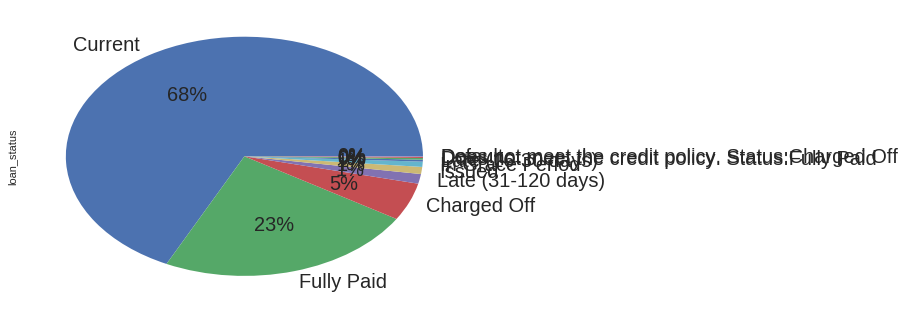

In [13]:
plt.figure()
df['loan_status'].value_counts().plot(kind='pie',autopct='%.0f%%',fontsize=20)
plt.show()

In [0]:
df['loan_status']=df['loan_status'].map(lambda x:0 if x=='Fully Paid' or x=='Current' else 1)

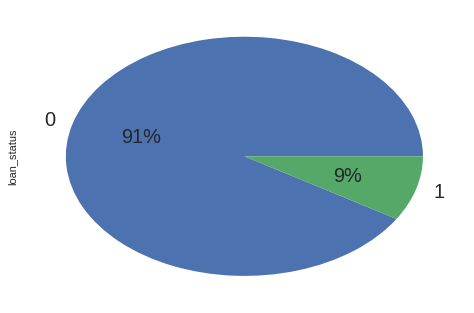

In [16]:
plt.figure()
df['loan_status'].value_counts().plot(kind='pie',autopct='%.0f%%',fontsize=20)
plt.show()

In [0]:
unpaid = df.loc[df["loan_status"] == 1]
paid=df.loc[df["loan_status"] == 0]
# d.isnull().sum().sum()


In [18]:
unpaid.isnull().sum().sum()

13136

In [19]:
paid.isnull().sum().sum()

57276

In [20]:
# Now we will replace the total current balance null values by 0 as not available implies that there is no money in the account
unpaid['tot_cur_bal']=unpaid['tot_cur_bal'].fillna(0)
paid['tot_cur_bal']=paid['tot_cur_bal'].fillna(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
paid['tot_cur_bal'].isnull().sum()
unpaid['tot_cur_bal'].isnull().sum()
paid.isnull().sum()

loan_amnt         0
dti               0
total_pymnt       0
int_rate          0
annual_inc        0
revol_bal         0
pub_rec           0
open_acc          0
recoveries        0
funded_amnt       0
tot_cur_bal       0
delinq_2yrs       0
loan_status       0
total_acc         0
emp_length        0
home_ownership    0
purpose           0
dtype: int64

In [22]:
unpaid.isnull().sum()

loan_amnt          1
dti                1
total_pymnt        1
int_rate           1
annual_inc         5
revol_bal          1
pub_rec           30
open_acc          30
recoveries         1
funded_amnt        1
tot_cur_bal        0
delinq_2yrs       30
loan_status        0
total_acc         30
emp_length         1
home_ownership     1
purpose            1
dtype: int64

In [23]:
unpaid['pub_rec'].fillna(unpaid['pub_rec'].mean(),inplace=True)
unpaid['open_acc'].fillna(unpaid['open_acc'].mean(),inplace=True)
# unpaid['int_rate'].fillna(unpaid['int_rate'].mean(),inplace=True)
unpaid['total_pymnt'].fillna(unpaid['total_pymnt'].mean(),inplace=True)
unpaid['total_acc'].fillna(unpaid['total_acc'].mean(),inplace=True)
unpaid['delinq_2yrs'].fillna(unpaid['delinq_2yrs'].mean(),inplace=True)
unpaid['annual_inc'].fillna(unpaid['annual_inc'].mean(),inplace=True)
# unpaid['home_ownership'].fillna('other',inplace=True)
# unpaid['emp_length'].fillna('>1 year',inplace=True)
unpaid['dti'].fillna(unpaid['dti'].mean(),inplace=True)
# unpaid['revol_bal'].fillna(unpaid['revol_bal'].mean(),inplace=True)
# unpaid['recoveries'].fillna(unpaid['recoveries'].mean(),inplace=True)
# unpaid['funded_amnt'].fillna(unpaid['funded_amnt'].mean(),inplace=True)
# unpaid['purpose'].fillna('other',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [24]:
unpaid['revol_bal'].fillna(unpaid['revol_bal'].mean(),inplace=True)
unpaid['recoveries'].fillna(unpaid['recoveries'].mean(),inplace=True)
unpaid['funded_amnt'].fillna(unpaid['funded_amnt'].mean(),inplace=True)
unpaid['purpose'].fillna('other',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [25]:
unpaid['emp_length'].fillna('1 year',inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
df['int_rate'].dropna(inplace=True)

In [27]:
# Making a list of required loan status titles
# r_list=['Current','Fully Paid','Charged Off','Late (31-120 days)','Late (16-30 days)','Default']

# Filtering off the required loan_status points with the titles in the r_list 
# c_data=df[df['loan_status'].isin(r_list)]               

# Building loan status as 0 or 1
# c_data['loan_status']=c_data['loan_status'].map(lambda x:0 if x=='Fully Paid' or x=='Current' else 1)

# Converting strings of  emp_length to a range of values of 0 to 10 depending on the number of years
paid['emp_length']=paid['emp_length'].map(lambda x:0 if x=='< 1 year' or x=='n/a' else (10 if x=='10+ years' else (0 if x==np.nan else float(x.rstrip(' years')) )))
unpaid['emp_length']=unpaid['emp_length'].map(lambda x:0 if x=='>1 year' or x=='n/a' or x=='< 1 year' else (10 if x=='10+ years' else (0 if x==np.nan else float(x.rstrip(' years')) )))

# # Converting the home ownership into 0,1,2,3,4 depending on the ownership
unpaid['home_ownership']=unpaid['home_ownership'].map(lambda x:0 if x== 'MORTGAGE' else (1 if x=='OWN' else (2 if x=='RENT' else(3 if x=='OTHERS' else(4 if x=='NONE'else 5)))))
paid['home_ownership']=paid['home_ownership'].map(lambda x:0 if x== 'MORTGAGE' else (1 if x=='OWN' else (2 if x=='RENT' else(3 if x=='OTHERS' else(4 if x=='NONE'else 5)))))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [28]:
df= pd.concat([paid, unpaid], ignore_index=True)
df.isnull().sum()


loan_amnt         1
dti               0
total_pymnt       0
int_rate          1
annual_inc        0
revol_bal         0
pub_rec           0
open_acc          0
recoveries        0
funded_amnt       0
tot_cur_bal       0
delinq_2yrs       0
loan_status       0
total_acc         0
emp_length        0
home_ownership    0
purpose           0
dtype: int64

**DATA CLEANING:**
Now we will clean the data having all the irrelavent points(None and Not available values) and converting strings to required float or int values

In [29]:
# cleaning the data.Replacing the % symbol with empty string and also converting all int_rate points to float
df[['int_rate']]=df.int_rate.str.replace('%','')
df[['int_rate']] = df[['int_rate']].apply(pd.to_numeric) 

#Counting the number of available loan status categories
df['loan_status'].value_counts()

0    809505
1     77878
Name: loan_status, dtype: int64

In [30]:
df.dropna(inplace=True)
df.isnull().sum()

loan_amnt         0
dti               0
total_pymnt       0
int_rate          0
annual_inc        0
revol_bal         0
pub_rec           0
open_acc          0
recoveries        0
funded_amnt       0
tot_cur_bal       0
delinq_2yrs       0
loan_status       0
total_acc         0
emp_length        0
home_ownership    0
purpose           0
dtype: int64

In [0]:
c_data=df

In [0]:
c_data=c_data.drop('purpose',axis=1)


**DATA TRANSFORMATION:**
Here we used the data that we fecthed ad cleaned and transformed it to different dataframes by splitting it in terms of TITLES

In [44]:
#Grouping the data by credit card ,debt and medical titles
debt_data=c_data[c_data.purpose == 'debt_consolidation']
medical_data=c_data[c_data.purpose == 'medical']
credit_data=c_data[c_data.purpose == 'credit_card']

# Droping the unrequired coloumn purpose
medical_data=medical_data.drop('purpose',axis=1)
debt_data=debt_data.drop('purpose',axis=1)
credit_data=credit_data.drop('purpose',axis=1)
credit_data.shape

(206183, 16)

**DATA INSPECTION**
We will now find out weather the given dataset is balanced or imbalanced by plotting the data according to the titles

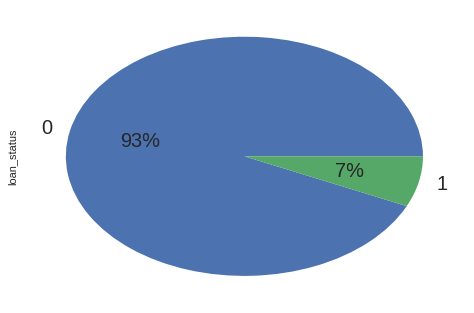

In [36]:
plt.figure()
credit_data['loan_status'].value_counts().plot(kind='pie',autopct='%.0f%%',fontsize=20)
plt.show()

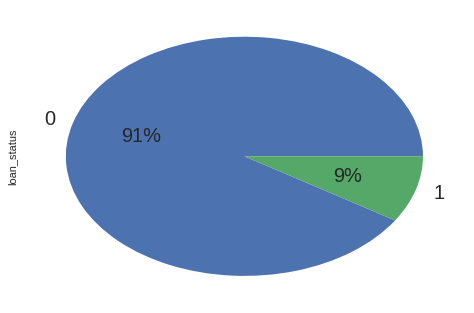

In [37]:
plt.figure()
debt_data['loan_status'].value_counts().plot(kind='pie',autopct='%.0f%%',fontsize=20)
plt.show()

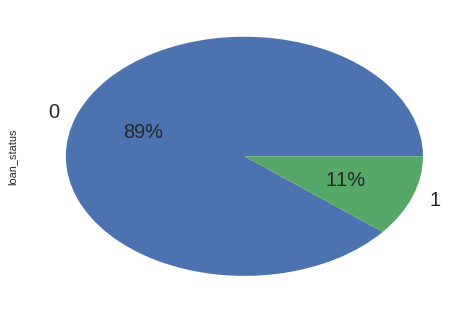

In [38]:
plt.figure()
medical_data['loan_status'].value_counts().plot(kind='pie',autopct='%.0f%%',fontsize=20)
plt.show()

From the above plots it is clear that the dataset is imbalanced.Now we will know about the distribution of datapoints using all possible combinations using pairplot

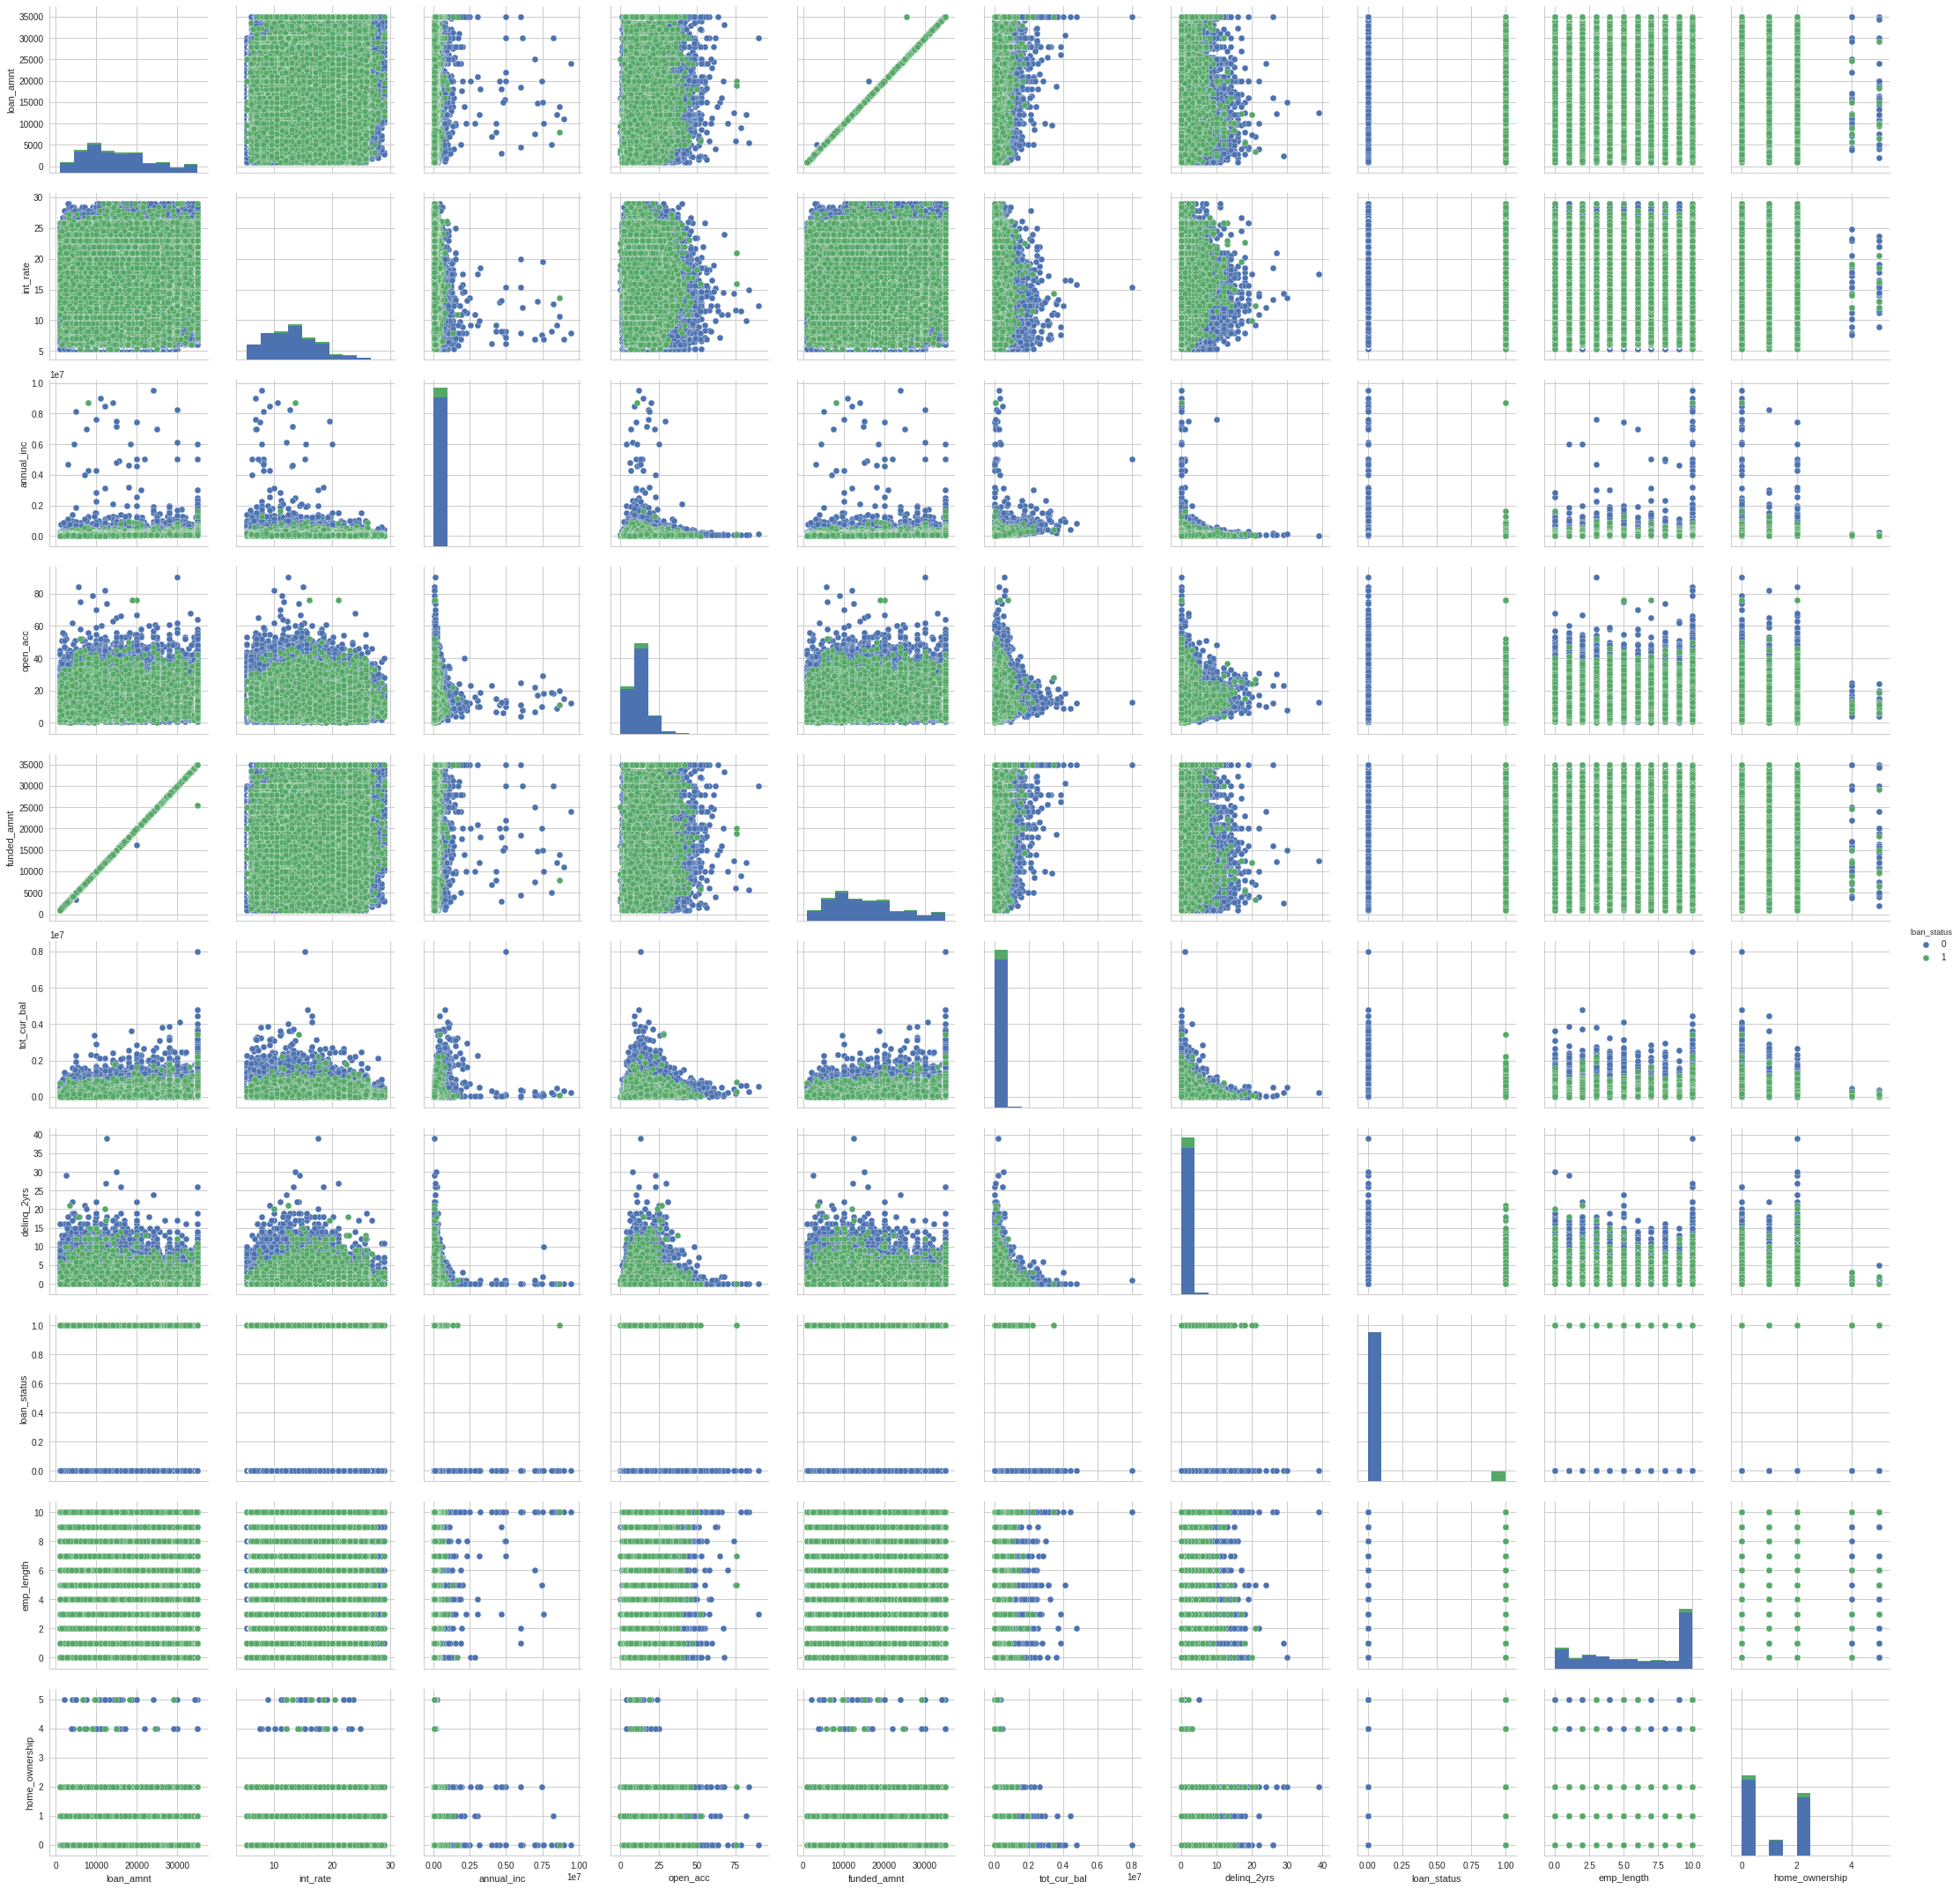

In [0]:
# Plotting a pair plot for all the features of the lone dataset
plt.close();
sns.set_style("whitegrid");
sns.pairplot(c_data, hue="loan_status", size=3);
plt.show()

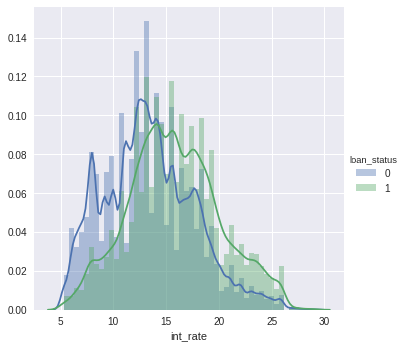

In [245]:
sns.FacetGrid(debt_data, hue="loan_status", size=5) \
   .map(sns.distplot, "int_rate") \
   .add_legend();
plt.show();
# loan_amnt1,int_rate1,annual_inc1,open_acc1,funded_amnt1,tot_cur_bal1,delinq_2yrs1,loan_status,emp_length1,home_ownership1,purpose



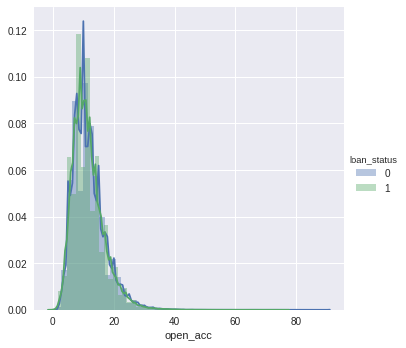

In [246]:
sns.FacetGrid(debt_data, hue="loan_status", size=5) \
   .map(sns.distplot, "open_acc") \
   .add_legend();
plt.show();



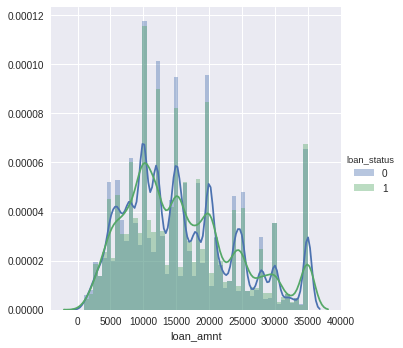

In [0]:
sns.FacetGrid(debt_data, hue="loan_status", size=5) \
   .map(sns.distplot, "loan_amnt") \
   .add_legend();
plt.show();



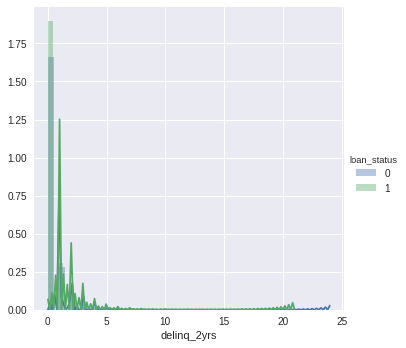

In [0]:
sns.FacetGrid(debt_data, hue="loan_status", size=5) \
   .map(sns.distplot, "delinq_2yrs") \
   .add_legend();
plt.show();



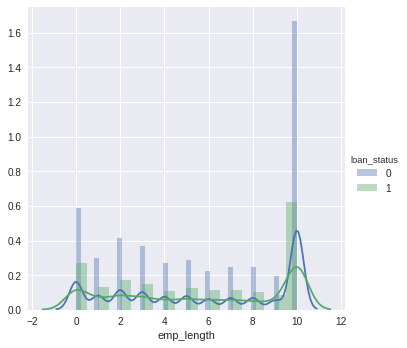

In [0]:
sns.FacetGrid(debt_data, hue="loan_status", size=5) \
   .map(sns.distplot, "emp_length") \
   .add_legend();
plt.show();



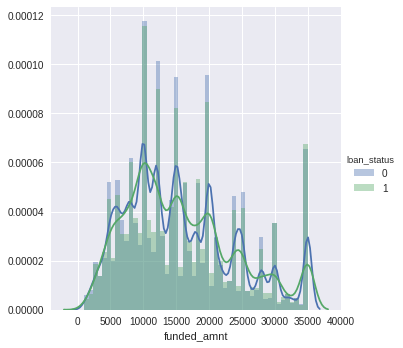

In [0]:
sns.FacetGrid(debt_data, hue="loan_status", size=5) \
   .map(sns.distplot, "funded_amnt") \
   .add_legend();
plt.show();



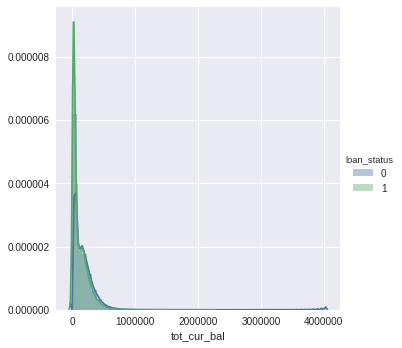

In [0]:
sns.FacetGrid(debt_data, hue="loan_status", size=5) \
   .map(sns.distplot, "tot_cur_bal") \
   .add_legend();
plt.show();



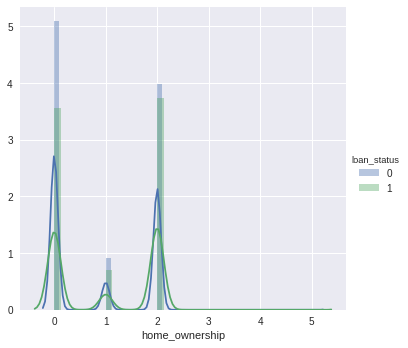

In [0]:
sns.FacetGrid(debt_data, hue="loan_status", size=5).map(sns.distplot, "home_ownership").add_legend();
plt.show();



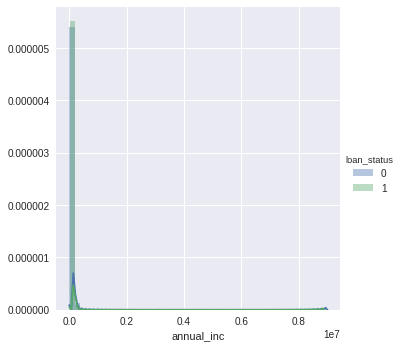

In [247]:
sns.FacetGrid(debt_data, hue="loan_status", size=5) \
   .map(sns.distplot, "annual_inc") \
   .add_legend();
plt.show();



In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import seaborn as sn
labels=credit_data['loan_status'].values
credit_data=credit_data.drop('loan_status',axis=1)
standardized_data = StandardScaler().fit_transform(credit_data)
sample_data = standardized_data
# initializing the pca
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)


Now we will plot the PCA of the data given accordingly for credit ,debt and medical titles

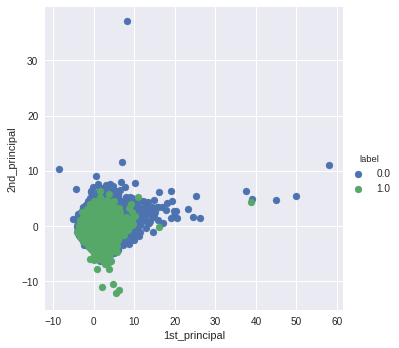

In [40]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label",size=5).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [0]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(debt_data)
d_labels=debt_data['loan_status'].values
debt_data=debt_data.drop('loan_status',axis=1)
debt_standardized_data = StandardScaler().fit_transform(debt_data)
debt_sample_data = debt_standardized_data
# initializing the pca
pca = decomposition.PCA()
pca.n_components = 2
d_pca_data = pca.fit_transform(debt_sample_data)

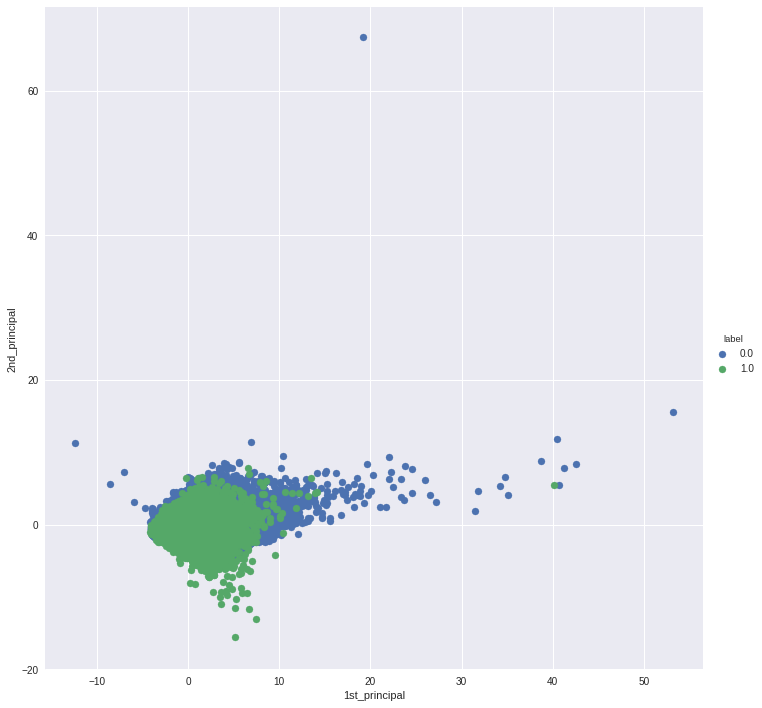

In [42]:
# attaching the label for each 2-d data point 
d_pca_data = np.vstack((d_pca_data.T, d_labels)).T
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=d_pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label",size=10).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()


In [0]:
medical_data.dropna(inplace=True)
medical_data.isnull().sum()

loan_amnt         0
int_rate          0
annual_inc        0
open_acc          0
funded_amnt       0
tot_cur_bal       0
delinq_2yrs       0
loan_status       0
emp_length        0
home_ownership    0
dtype: int64

In [0]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(medical_data)
m_labels=medical_data['loan_status'].values
m_data=medical_data.drop('loan_status',axis=1)
m_standardized_data = StandardScaler().fit_transform(medical_data)
m_sample_data = m_standardized_data
# initializing the pca
pca = decomposition.PCA()
pca.n_components = 2
m_pca_data = pca.fit_transform(m_sample_data)

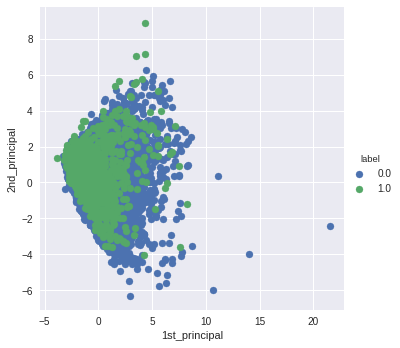

In [253]:
# attaching the label for each 2-d data point 
m_pca_data = np.vstack((m_pca_data.T, m_labels)).T
# creating a new data fram which help us in ploting the result data
m_pca_df = pd.DataFrame(data=m_pca_data, columns=("1st_principal", "2nd_principal","label"))
sn.FacetGrid(m_pca_df, hue="label",size=5).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [0]:
debt_data.dropna(inplace=True)
debt_data.isnull().sum()

loan_amnt         0
int_rate          0
annual_inc        0
open_acc          0
funded_amnt       0
tot_cur_bal       0
delinq_2yrs       0
loan_status       0
emp_length        0
home_ownership    0
dtype: int64

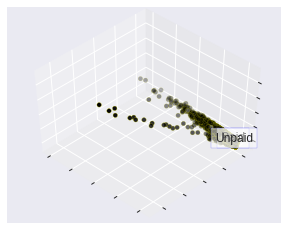

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = debt_data
y = d_labels

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Paid', 0), ('Unpaid', 1)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='b', facecolor='b'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
           edgecolor='y')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

From the above plots it is clear that with none of the features selected we could clearly differentiaite between the loan status 0 and 1.So we will now proceed to some feature selection



**Feature Selection**



The following are the different automatic feature selection techniques:


Univariate Selection


Recursive Feature Elimination


Principle Component Analysis


Feature Importance

In [0]:
t=list(credit_data.columns.values)

[0.065 0.105 0.105 0.098 0.106 0.106 0.02  0.09  0.004 0.064 0.106 0.029
 0.004 0.098]
['loan_amnt', 'dti', 'total_pymnt', 'int_rate', 'annual_inc', 'revol_bal', 'pub_rec', 'open_acc', 'recoveries', 'funded_amnt', 'tot_cur_bal', 'delinq_2yrs', 'loan_status', 'total_acc']


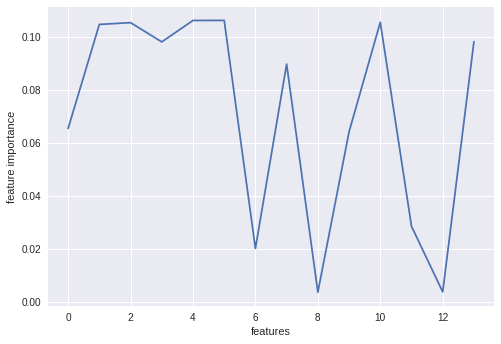

In [65]:

# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data
# # array=credit_data.drop("loan_status",axis=1)
# array = credit_data.values
# X = array[:,0:14]
# Y = array[:,14]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)
print(t)
plt.close()
plt.plot(range(0,14,1),model.feature_importances_)

plt.xlabel('features')
plt.ylabel('feature importance')
plt.show()

In [0]:
# # Feature Extraction with PCA
# import numpy
# from pandas import read_csv
# from sklearn.decomposition import PCA

# # array=credit_data.drop("loan_status",axis=1)
# # array = credit_data.values
# # X = array[:,0:14]
# # Y = array[:,14]
# # feature extraction
# pca = PCA(n_components=6)
# fit = pca.fit(X)
# # summarize components
# print("Explained Variance: %s") % fit.explained_variance_ratio_
# # print(fit.components_)

From the above observations it is clear that the following features are having less importance than the others .They include:

Emp_length and home_ownership.


In [0]:
#droping the less efficient parameters from credit data
credit_data=credit_data.drop("open_acc",axis=1)
credit_data=credit_data.drop("delinq_2yrs",axis=1)

#droping the less efficient parameters from debt data
debt_data=debt_data.drop("open_acc",axis=1)
debt_data=debt_data.drop("delinq_2yrs",axis=1)

#droping the less efficient parameters from medical data
medical_data=medical_data.drop("open_acc",axis=1)
medical_data=medical_data.drop("delinq_2yrs",axis=1)



Now we will draw the CDF's for the remaining features in the dataset

In [0]:
credit_paid = credit_data.loc[credit_data["loan_status"] == 0];
credit_notpaid=credit_data.loc[credit_data["loan_status"] == 1];


In [0]:
debt_paid = debt_data.loc[debt_data["loan_status"] == 0];
debt_notpaid=debt_data.loc[debt_data["loan_status"] == 1];


In [0]:
medical_paid = medical_data.loc[medical_data["loan_status"] == 0];
medical_notpaid=medical_data.loc[medical_data["loan_status"] == 1];


[1.599e-01 2.392e-01 2.047e-01 2.053e-01 9.975e-02 6.292e-02 1.601e-02
 9.324e-03 2.686e-03 2.291e-04]
[ 5.32   7.687 10.054 12.421 14.788 17.155 19.522 21.889 24.256 26.623
 28.99 ]
[0.05  0.123 0.144 0.248 0.178 0.128 0.074 0.032 0.019 0.004]
[ 5.32   7.576  9.832 12.088 14.344 16.6   18.856 21.112 23.368 25.624
 27.88 ]


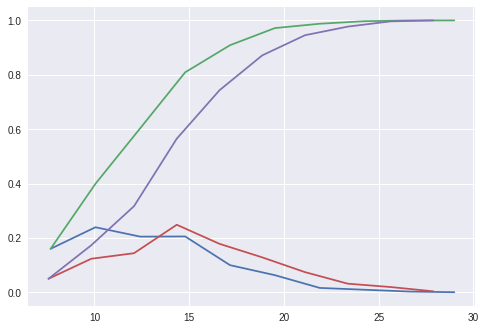

In [51]:


counts, bin_edges = np.histogram(credit_paid['int_rate'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# credit_notpaid
counts, bin_edges = np.histogram(credit_notpaid['int_rate'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

[0.085 0.159 0.182 0.235 0.148 0.117 0.036 0.025 0.011 0.002]
[ 5.32   7.687 10.054 12.421 14.788 17.155 19.522 21.889 24.256 26.623
 28.99 ]
[0.026 0.068 0.126 0.212 0.203 0.187 0.079 0.065 0.032 0.002]
[ 5.32   7.687 10.054 12.421 14.788 17.155 19.522 21.889 24.256 26.623
 28.99 ]


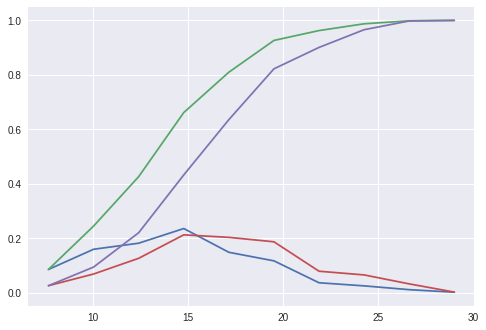

In [52]:

counts, bin_edges = np.histogram(debt_paid['int_rate'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# credit_notpaid
counts, bin_edges = np.histogram(debt_notpaid['int_rate'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[0.062 0.095 0.148 0.249 0.158 0.162 0.06  0.037 0.027 0.001]
[ 5.32   7.637  9.954 12.271 14.588 16.905 19.222 21.539 23.856 26.173
 28.49 ]
[0.018 0.061 0.122 0.216 0.177 0.187 0.096 0.076 0.041 0.005]
[ 5.42   7.777 10.134 12.491 14.848 17.205 19.562 21.919 24.276 26.633
 28.99 ]


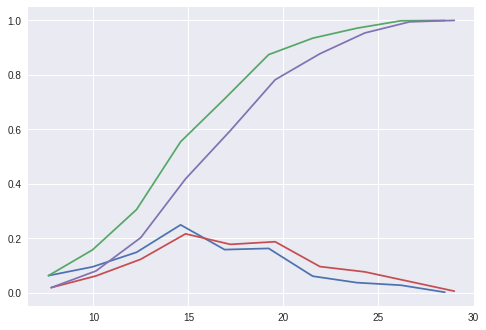

In [53]:


counts, bin_edges = np.histogram(medical_paid['int_rate'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# credit_notpaid
counts, bin_edges = np.histogram(medical_notpaid['int_rate'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

**PARAMETER TUNING FOR DECISION TREES**:

The following are the parameters which influence the performance of the decision tree .They are:


max_depth


max_samples_leaf


min_samples_split


max_features

In [0]:
from sklearn.model_selection import train_test_split

#own spliting of debit data into data and target
# d_target=c_data['loan_status'].values
# c_data=c_data.drop('loan_status',axis=1)
d_data=c_data.as_matrix(columns=None)
# data.shape
# print(type(data))
# clf.predict(debt_data[:3])
d_train,d_test,da_train,da_test=train_test_split(d_target,d_data,test_size=0.3,stratify = d_target)



**Maximum_Depth**


Maximum depth using cross validation scores

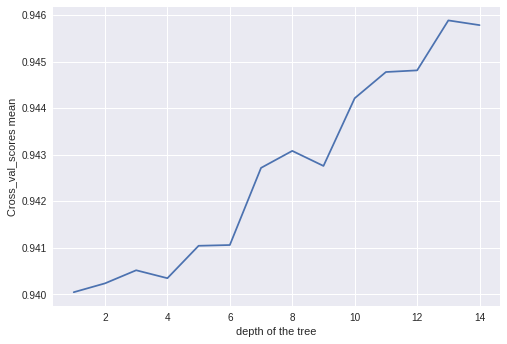

In [80]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import metrics
best_model=[]

for i in range(1,15):
    X_train,X_test,Y_train,Y_test=train_test_split(d_data,d_target,test_size=0.3)
    model=tree.DecisionTreeClassifier(max_depth=i)
    kfold=StratifiedKFold(n_splits=10,shuffle=True)
    scores=cross_val_score(model,X_train,Y_train,cv=kfold)
    best_model.append(scores.mean())
plt.plot(range(1,15),best_model)
plt.xlabel("depth of the tree")
plt.ylabel("Cross_val_scores mean")
plt.show()


Maximum depth using ROC_AUC(Receiver Operating Charecteristic_Area Under the Curve)

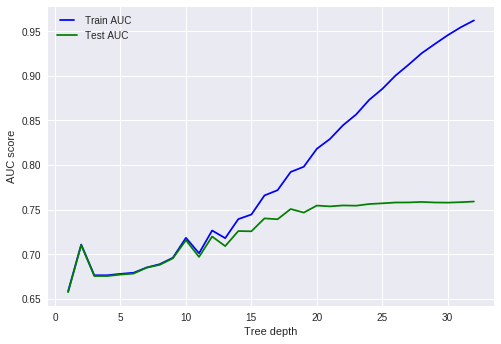

In [81]:
#max_depth of decision tree
# min_samples_splits=[2,5,10]
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(da_train, d_train)
   train_pred = dt.predict(da_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(d_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(da_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(d_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
line1, = plt.plot(max_depths, train_results,"b", label="Train AUC")
line2, = plt.plot(max_depths, test_results,"g", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

From both the metrics available(cvv scores mean and AUC_ROC) we could see that the best depth for the tree is 10 to 12 as the depth above this would cause overfitting

**MIN_SAMPLES_LEAF:**

This is the minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree.

MIN_SAMPLES_LEAF with f1 score:
Initially we are cross validating the data and checking for which values of the split the performance is good.

From the below graph it is clear that the the value of K should be 4 as we have f1 score of 0.95  there.

**F1 Score:**
src:http://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.

F1 Score = 2*(Recall x Precision) / (Recall + Precision)

In scikit learn F1 score function returns F1 score of the positive class in binary classification or weighted average of the F1 scores of each class for the multiclass task.

Average:The type of averaging performed on data

  -micro:Calculate metrics globally by counting the total true positives, false negatives and false positives

In [0]:
from sklearn.model_selection import KFold # import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification
# from sklearn.cross_validation import StratifiedShuffleSplit

f1score_test_results=[]
c=0
f1score_train_results=[]
kf = KFold(n_splits=6) # Define the split - into 2 folds 
kf.get_n_splits(d_target)
for train_index, test_index in kf.split(d_target):
  X_train, X_test = d_target[train_index], d_target[test_index]
  y_train, y_test = d_data[train_index], d_data[test_index]
  clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0)
  clf_gini.fit(y_train,X_train)
  c+=1
#   t_pred=clf_gini.predict(y_train)
  d_pred = clf_gini.predict(y_test)
  # print ("Accuracy is ", accuracy_score(d_test,d_pred)*100)
  f1score_test_results.append(f1_score(X_test,d_pred,average='micro'))
#   f1score_train_results.append(f1_score(y_test,t_pred))
# line1, = plt.plot(range(0,1,20), f1score_train_results,"b", label="Train f1score")
  

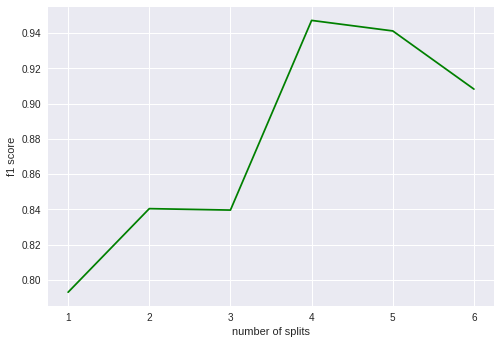

In [0]:
plt.plot([1,2,3,4,5,6], f1score_test_results,"g", label="Test f1score")
# plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("f1 score")
plt.xlabel("number of splits")
plt.show()

Here we split the data with 4 fold cross validation and got the train and test sets

In [0]:
from sklearn.model_selection import KFold # import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification
# from sklearn.cross_validation import StratifiedShuffleSplit

f1score_test_results=[]
c=0
f1score_train_results=[]
kf = KFold(n_splits=4) # Define the split - into 4 folds 
kf.get_n_splits(d_target)
for train_index, test_index in kf.split(d_target):
  X_train, X_test = d_target[train_index], d_target[test_index]
  y_train, y_test = d_data[train_index], d_data[test_index]
  
  
da_train=y_train
d_train=X_train
d_test=X_test
da_test=y_test


In [319]:
# min_samples_leafs = np.linspace(0.1,1,20, endpoint=True)
# min_samples_splits=[2,5,10]
from sklearn.metrics import roc_curve, auc
train_results = []
test_results = []
f1score_train1_results=[]
f1score_test1_results=[]
for i in range(2,30):
   dt = DecisionTreeClassifier(min_samples_leaf=i)
   dt.fit(da_train, d_train)
   train_pred = dt.predict(da_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(d_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(da_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(d_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
   f1score_test1_results.append(f1_score(d_test, y_pred))
   f1score_train1_results.append(f1_score(d_train, train_pred))


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


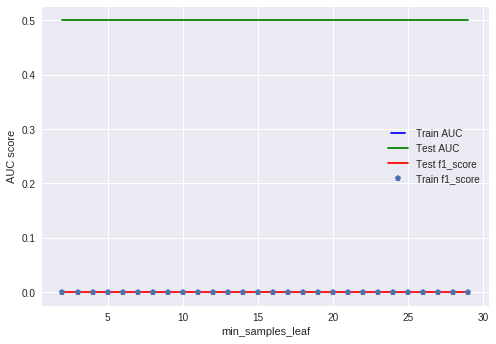

In [320]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(range(2,30,1), train_results,"b", label="Train AUC")
line2, = plt.plot(range(2,30,1), test_results,"g", label="Test AUC")
line3, = plt.plot(range(2,30,1), f1score_test1_results,"r", label="Test f1_score")
line4, = plt.plot(range(2,30,1), f1score_train1_results,"p", label="Train f1_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min_samples_leaf")
plt.show()

From the above graph it is desired to take the min_samples_leaf to be in the range of 5 to 10 as an AUC score of 0.5 and above is desirable

**MIN_SAMPLES_SPLIT:**

min_samples_split represents the minimum number of samples required to split an internal node.

In [321]:
# min_samples_splits = np.linspace(1.0,1.0,10, endpoint=True)
train_results = []
test_results = []
f2score_train1_results=[]
f2score_test1_results=[]
for i in range(3,20,1):
   dt = DecisionTreeClassifier(min_samples_split=i,max_depth=10)
   dt.fit(da_train, d_train)
   train_pred = dt.predict(da_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(d_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(da_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(d_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   f2score_test1_results.append(f1_score(d_test, y_pred,average='micro'))
   f2score_train1_results.append(f1_score(d_train, train_pred,average='micro'))
   # Add auc score to previous test results
   test_results.append(roc_auc)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


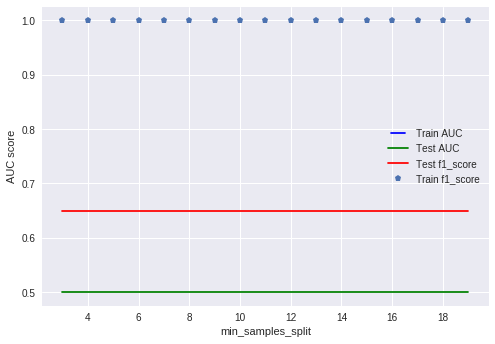

In [322]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(range(3,20,1), train_results,"b", label="Train AUC")
line2, = plt.plot(range(3,20,1), test_results,"g", label="Test AUC")
line3, = plt.plot(range(3,20,1), f2score_test1_results,"r", label="Test f1_score")
line4, = plt.plot(range(3,20,1), f2score_train1_results,"p", label="Train f1_score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
plt.ylabel("AUC score")
plt.xlabel("min_samples_split")
plt.show()

From the above plot we can see that though we have a constant value all over we prefer to have min_samples_split in the range of 10 to 15 as value below or above it gives underfitting and overfitting respectively

**MAX_FEATURES:**

max_features represents the number of features to consider when looking for the best split.


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


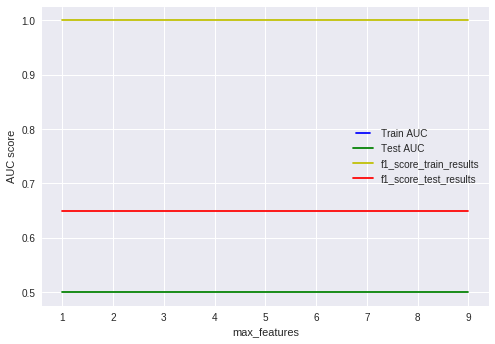

In [323]:
max_features=[1,2,3,4,5,6,7,8,9]
train_results = []
test_results = []
# train_error=[]
# test_error=[]
f3score_train1_results=[]
f3score_test1_results=[]

for max_feature in range(1,10):
  dt = DecisionTreeClassifier(max_features=max_feature)
  dt = dt.fit(da_train,d_train)
#   train and test errors
#   y_pr = dt.predict(da_test)
#   z = dt.score(da_train, d_train)
#   t=dt.score(da_test,d_test)
#   train_error.append(z)
#   test_error.append(t)
  dt.fit(da_train, d_train)
  train_pred = dt.predict(da_train)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(d_train, train_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  # Add auc score to previous train results
  train_results.append(roc_auc)
  y_pred = dt.predict(da_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(d_test, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate)
  # Add auc score to previous test results
  test_results.append(roc_auc)
  f3score_test1_results.append(f1_score(d_test, y_pred,average='micro'))
  f3score_train1_results.append(f1_score(d_train, train_pred,average='micro'))
  
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results,"b", label="Train AUC")
line2, = plt.plot(max_features, test_results,"g", label="Test AUC")
line3, =plt.plot(max_features,f3score_train1_results,"y", label="f1_score_train_results")
line4, =plt.plot(max_features,f3score_test1_results,"r", label="f1_score_test_results")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("max_features")
plt.show()

From the above graph we would consider our max features to be 9 as we have slightly greater f1 score for test results there 


**BUILDING A DECISION TREE**


The decision tree is built initially with all the features explored and the train and test data are stratified while they are being split.

In [0]:
# global m_train,m_test,m_train1,m_test1
def predict_accuracy_CR_CM_of_DT(my_data,my_min_splits_leaves,my_max_features,my_max_depth,my_min_samples_split,my_criterion):
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import precision_recall_curve
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import classification_report, confusion_matrix
  from sklearn.model_selection import KFold # import KFold
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import f1_score
  from sklearn.datasets import make_classification
  from sklearn.metrics import roc_curve, auc
  from sklearn.metrics import accuracy_score
  from sklearn.cross_validation import cross_val_score, cross_val_predict
  from sklearn import metrics
  m_target=my_data['loan_status'].values
  m_data=my_data.drop('loan_status',axis=1)
  m_data=m_data.as_matrix(columns=None)
  m_train,m_test,m_train1,m_test1=train_test_split(m_target,m_data,test_size=0.3)
  # from sklearn.tree import DecisionTreeClassifier
  #credit data with gini
  clf= DecisionTreeClassifier(criterion = my_criterion,max_depth=my_max_depth,min_samples_split=my_min_samples_split,max_features=my_max_features,min_samples_leaf=my_min_splits_leaves,random_state = 30)
  clf.fit(m_train1,m_train)
  m_pred = clf.predict(m_test1)
  print ("Accuracy is ", accuracy_score(m_test,m_pred)*100)
  print(confusion_matrix(m_test, m_pred))  
  clf.feature_importances_
  print(classification_report(m_test, m_pred))
  train_pred2 = clf.predict(m_train1)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(m_train, train_pred2)
  roc_auc_train = auc(false_positive_rate, true_positive_rate)
  y_pred1 = clf.predict(m_test1)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(m_test, y_pred1)
  roc_auc_test = auc(false_positive_rate, true_positive_rate)
  print("the roc_auc for test and train are",roc_auc_test,roc_auc_train)
  t=mean_squared_error(m_test, y_pred1)
  print("THe MSE is :",t)
#   scores = cross_val_score(clf,m_data,m_target, cv=6)
  predictions = cross_val_predict(clf,m_data,m_target, cv=6)
  accuracy = metrics.r2_score(m_test,y_pred1)
  print ("Cross-Predicted Accuracy:", accuracy)
  return clf,m_train,m_test,m_test1,m_train1

In [0]:
 def draw_a_DTree(model):
  import graphviz
  from sklearn import tree
  # clf = tree.DecisionTreeClassifier()
  # clf = clf.fit(X_train,Y_train)
  dot_data = tree.export_graphviz(model, out_file=None) 
  graph = graphviz.Source(dot_data) 
  graph.render("credit_data")
  dot_data = tree.export_graphviz(model, out_file=None, 
                           feature_names=['loan_amnt',
 'dti',
 'total_pymnt',
 'int_rate',
 'annual_inc',
 'revol_bal',
 'pub_rec',
 'recoveries',
 'funded_amnt',
 'tot_cur_bal',
 'total_acc',
 'emp_length',
 'home_ownership'],  
                           class_names=['fullypaid','Notpaid'],  
                           filled=True, rounded=True,  
                         special_characters=True)  
  graph = graphviz.Source(dot_data)  
  return graph

In [0]:
 def error_graphs(clf,m_train,m_test,m_test1,m_train1):
  import numpy as np
  import pandas as pd
  from sklearn import tree
  from sklearn.cross_validation import cross_val_score
  from pprint import pprint
  from sklearn.metrics import f1_score
  from sklearn.model_selection import train_test_split

  # features = ["loan_status","loan_amnt","int_rate","annual_inc","open_acc","funded_amnt","emp_length","home_ownership"]

  # df = pd.read_csv('magic04.data',header=None,names=features)
  # df['class'] = df['class'].map({'g':0,'h':1})
  # y = df['class']

  depth = []
  o=[]
  train_error=[]
  test_error=[]
  for i in range(3,10):
     o.append(i)
     clf = clf.fit(np.array(m_train1),np.array(m_train))
     z = clf.score(np.array(m_train1),np.array(m_train))
     y_pred=clf.predict(m_test1)
     t=f1_score(y_pred,m_test)
     train_error.append(z)
     test_error.append(t)
  import matplotlib.pyplot as plt

#   print(depth)
  plt.figure(figsize=(8, 8))
  plt.subplots_adjust()
  plt.title("Train and test errors" )
  plt.plot(o,train_error,label="train error")
  plt.plot(o,test_error,label="test error")
  plt.legend()
  plt.show()


**The following decision trees are drawn for all the 15 features and all the other features are set to their default values and the accuracies are as follows: **

In [131]:
clf,m_train,m_test,m_test1,m_train1=predict_accuracy_CR_CM_of_DT(credit_data,5,11,5,5,'gini')
# error_graphs(clf,m_train,m_test,m_test1,m_train1)

Accuracy is  95.20168135154798
[[57407   246]
 [ 2722  1480]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97     57653
          1       0.86      0.35      0.50      4202

avg / total       0.95      0.95      0.94     61855

the roc_auc for test and train are 0.6739731623041437 0.671338998336836
THe MSE is : 0.04798318648452025
Cross-Predicted Accuracy: 0.2421892724524748


In [106]:
clf,m_train,m_test,m_test1,m_train1=predict_accuracy_CR_CM_of_DT(debt_data,5,11,5,5,'gini')

Accuracy is  93.81044733411757
[[142514    438]
 [  9296   5017]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97    142952
          1       0.92      0.35      0.51     14313

avg / total       0.94      0.94      0.93    157265

the roc_auc for test and train are 0.6737282701534837 0.6750909835500954
THe MSE is : 0.06189552665882428
Cross-Predicted Accuracy: 0.2518261684065015


In [107]:
clf,m_train,m_test,m_test1,m_train1=predict_accuracy_CR_CM_of_DT(medical_data,5,11,5,5,'gini')

Accuracy is  92.27166276346604
[[2242   49]
 [ 149  122]]
             precision    recall  f1-score   support

          0       0.94      0.98      0.96      2291
          1       0.71      0.45      0.55       271

avg / total       0.91      0.92      0.91      2562

the roc_auc for test and train are 0.714398230843941 0.7298708217944774
THe MSE is : 0.07728337236533958
Cross-Predicted Accuracy: 0.18294755186748712


In [181]:
clf,m_train,m_test,m_test1,m_train1=predict_accuracy_CR_CM_of_DT(c_data,5,14,5,5,'gini')

Accuracy is  94.08185113536052
[[242152    634]
 [ 15121   8308]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97    242786
          1       0.93      0.35      0.51     23429

avg / total       0.94      0.94      0.93    266215

the roc_auc for test and train are 0.6759959581221064 0.6786959167814895
THe MSE is : 0.05918148864639483
Cross-Predicted Accuracy: 0.26265024974290807


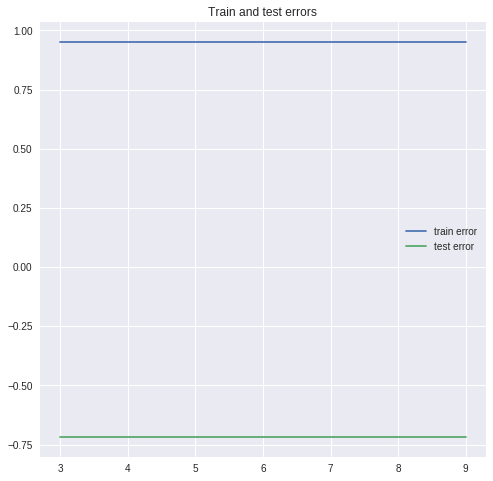

In [179]:
error_graphs(clf,m_train,m_test,m_test1,m_train1)

Sampling Techniques: From the above observations it is clear that the model is biased as it is only classifying the positive class of the data set .To avoid this we will go with the below sampling techniques :

-Undersampling:In Under sampling we will sample from class 1 the amount of data that is available in class 0(lower class)This is not a good idea as we will loose most of the data to train the model.Using Imbalanced-learn we can use Tomek’s link and edited nearest-neighbours which are the two cleaning methods .Therefore, imbalanced-learn implemented two ready-to-use class which pipeline both over- and under-sampling methods:

(i) SMOTETomek and

(ii) SMOTEENN.

-Oversampling:In this method we oversample the class 0 and class 1 till both of them are equally contained in the dataframe which will train our model unbiased.Apart from the random sampling with replacement, there is two popular methods to over-sample minority classes:

(i) Synthetic Minority Oversampling Technique (SMOTE) and

(ii) Adaptive Synthetic (ADASYN) sampling method.

In [174]:
# lets try and predict with an example
m_test2=np.array([[9.0000e+03, 5.3200e+00, 8.0000e+04, 1.4000e+01, 9.0000e+03,
       6.2833e+04, 0.0000e+00, 9.0000e+00, 0.0000e+00,6.2833e+04, 0.0000e+00, 9.0000e+00, 0.0000e+00,6.2833e+04, 0.00006],
       [1.600e+03, 1.398e+01, 1.750e+05,9.0000e+03, 5.3200e+00, 8.0000e+04, 0.000e+00, 1.000e+00,
        2.000e+00,6.2833e+04, 0.0000e+00, 9.0000e+00, 0.0000e+00,6.2833e+04, 0.0000e+00]])
y_pred=dt.predict(m_test2)
y_pred

array([1, 1])

Conclusions


A decision tree classifier was used to predict the loan status category (0 or 1) for loan data associated with specific search strings. Loans with a poor loan status category (target=1) were predicted with an accuracy in the range of 16-18% for the three search strings investigated.

The ability to accurately predict loans that are likely to end up with a poor outcome is valuable for lenders since this reduces the chance of funding a loan that results in a net financial loss.

Limitations


The poor loan data was plotted after the good loan data. Consequently, many of the good loan data points are hidden underneath the bad loan data points, resulting in an over representation of the bad data points in the plots.
The decision tree classifier was tested with only a single training set for each of the three search strings.
The date/time features of the data have not been taken into account.